In [1]:
from datetime import datetime
import matplotlib.pyplot as plt

import numpy as np
import torch

import sys
sys.path.append('../../tensnet/src/')
import tensnet as tt

torch.set_default_dtype(torch.float64)

In [9]:
Li = 10
d = 2

encoding_prefix = "seq"
opt_method = "linsys"
noq = 3 * Li
bd_max = 100
T = 20

if encoding_prefix == "seq":
    var = 1729581831
elif encoding_prefix == "sta":
    var = 1729495637

repo_name = f'{encoding_prefix}_{opt_method}_noq_{noq}_BD_{bd_max}_iter_{T}_{var}'

/var/folders/78/3qnd64k56s5fxxztb82f1rcc0000gn/T/ipykernel_94530/3949952452.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


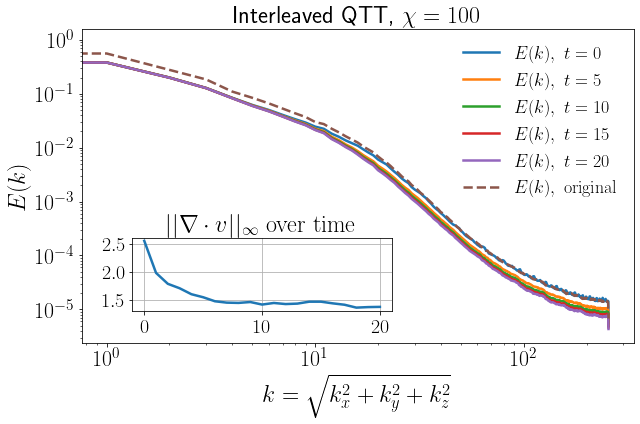

In [10]:
import torch
import matplotlib.pyplot as plt

# ——— Global style setup ———
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Sans Serif"],
    "text.latex.preamble": r"\renewcommand{\familydefault}{\sfdefault}",
    "lines.linewidth": 2.5,           # thicker lines
    "axes.labelsize": 24,
    "axes.titlesize": 24,
    "legend.fontsize": 22,            # default legend font size (overridden below)
    "xtick.labelsize": 22,
    "ytick.labelsize": 22
})

# ——— Load energy spectra ———
times_spec = [0, 5, 10, 15, 20]
Ek_dict = {
    t: torch.load(f'/Users/stefanopisoni/NoSync/3D_evolution/stat_tt/{repo_name}/E_k_{t}.tens')
    for t in times_spec
}
E_k_100_tens = torch.load(
    f'/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_{encoding_prefix}_100.tens'
)

# ——— Load divergence norms ———
times_div = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
div_l2 = [
    torch.load(f'/Users/stefanopisoni/NoSync/3D_evolution/stat_tt/{repo_name}/div_l2_{t}.tens').mean().item()
    for t in times_div
]
div_linf = [
    torch.load(f'/Users/stefanopisoni/NoSync/3D_evolution/stat_tt/{repo_name}/div_linf_{t}.tens').mean().item()
    for t in times_div
]

# ——— Plot ———
fig = plt.figure(figsize=(9, 6))

# Main energy‐spectrum axis
ax_main = fig.add_subplot(111)
for t in times_spec:
    ax_main.plot(Ek_dict[t], label=rf'$E(k),~t={t}$')
ax_main.plot(E_k_100_tens, label=r'$E(k), \mathrm{~original}$', linestyle='--')

ax_main.set_xscale('log')
ax_main.set_yscale('log')

if encoding_prefix == "seq":
    ax_main.set_xlabel(r'$k = \sqrt{k_x^2 + k_y^2 + k_z^2}$', fontsize=24)
ax_main.set_ylabel(r'$E(k)$', fontsize=24)

if encoding_prefix == "seq":
    ax_main.set_title(rf'Interleaved QTT, $\chi = {bd_max}$', fontsize=24)
elif encoding_prefix == "sta":
    ax_main.set_title(rf'Stacked QTT, $\chi = {bd_max}$', fontsize=24)

ax_main.tick_params(axis='both', which='major', labelsize=22)
ax_main.tick_params(axis='both', which='minor', labelsize=12)
ax_main.legend(fontsize=18, loc='upper right', frameon=False)

# ——— Inset parameters ———
if encoding_prefix == "seq":
    in_w, in_h = 0.40, 0.40   # smaller inset
    left, bottom = 0.21, 0.27 # shift right & up
    pad = 0.03               # less padding
elif encoding_prefix == "sta":
    in_w, in_h = 0.40, 0.40   # smaller inset
    left, bottom = 0.21, 0.18 # shift right & up
    pad = 0.03               # less padding

# Bottom‐inset: Linf norm
ax_linf = fig.add_axes([left, bottom, in_w, in_h/2 - pad])
ax_linf.plot(times_div, div_linf)
ax_linf.set_title(r'$||\nabla\cdot v||_\infty \mathrm{~over~time}$', fontsize=24)
ax_linf.tick_params(labelsize=20)
ax_linf.grid(True)

plt.tight_layout()
plt.savefig(f"Plots/{repo_name}.pdf", format="pdf")
plt.show()


L2 ans L_inf norms.

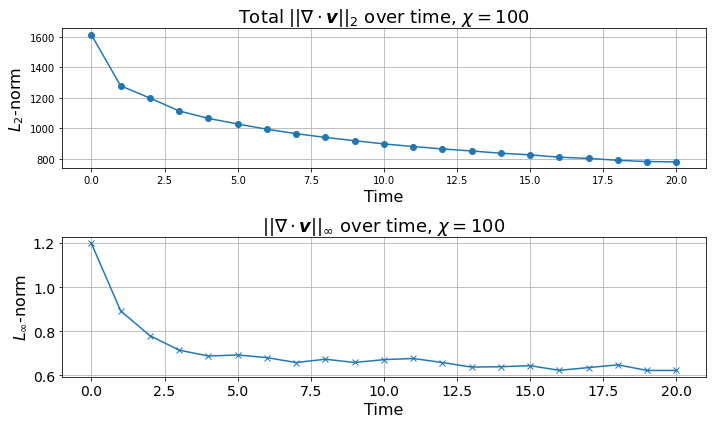

In [ ]:
times = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
variables_dict = {}

for time in times:
    for norm in ['linf', 'l2']:
        var_name = f"div_{norm}_{time}"
        variables_dict[var_name] = torch.load(f'/Users/stefanopisoni/NoSync/3D_evolution/stat_tt/{repo_name}/{var_name}.tens')


l2_values = []
linf_values = []

# Extract mean values from the loaded tensors
for time in times:
    l2_values.append(variables_dict[f'div_l2_{time}'].mean().item())
    linf_values.append(variables_dict[f'div_linf_{time}'].mean().item())

# Plotting
plt.figure(figsize=(10, 6))

# Plot L2 norm values
plt.subplot(2, 1, 1)
plt.plot(times, l2_values, marker='o')
plt.xlabel(r'Time', fontsize=16)
plt.ylabel(r'$L_2$-norm', fontsize=16)
plt.title(rf'Total $||\nabla \cdot \boldsymbol{{v}}||_2$ over time, $\chi = {bd_max}$', fontsize=18)
plt.grid(True)

# Plot Linf norm values
plt.subplot(2, 1, 2)
plt.plot(times, linf_values, marker='x')
plt.xlabel(r'Time', fontsize=16)
plt.ylabel(r'$L_{\infty}$-norm', fontsize=16)
# plt.title(rf'$||\nabla \cdot \boldsymbol{v}||_{\infty}$ over time, $\chi = {bd_max}$', fontsize=18)
plt.title(rf'$||\nabla \cdot \boldsymbol{{v}}||_{{\infty}}$ over time, $\chi = {bd_max}$', fontsize=18)
plt.grid(True)

# Adjust tick parameters for larger font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig(f"Plots/norms_{repo_name}.pdf", format="pdf")
plt.show()